### 1. Nearest Neighbors

In [1]:
import matplotlib
#matplotlib.use('Agg')
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [2]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [3]:
def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [4]:
ckd = Table.read_table(path_data + 'ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


In [5]:
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)
ckd

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


In [6]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

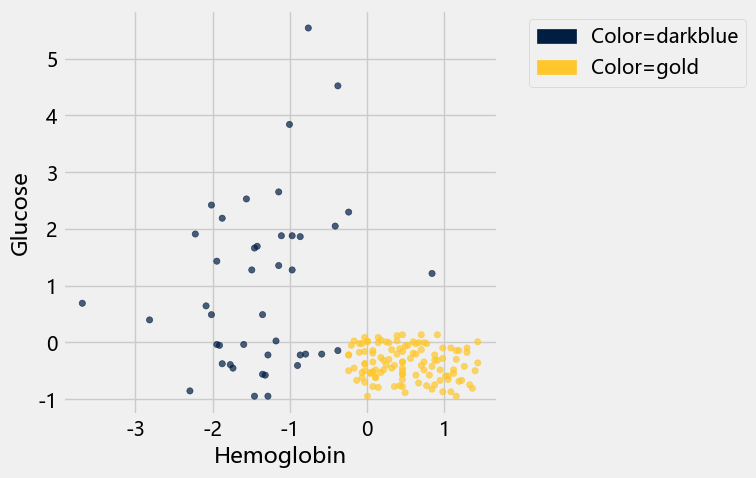

In [7]:
ckd.scatter('Hemoglobin', 'Glucose', group='Color')

In [8]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd.drop('White Blood Cell Count', 'Color')
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    ckd.scatter('Hemoglobin', 'Glucose', group='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);

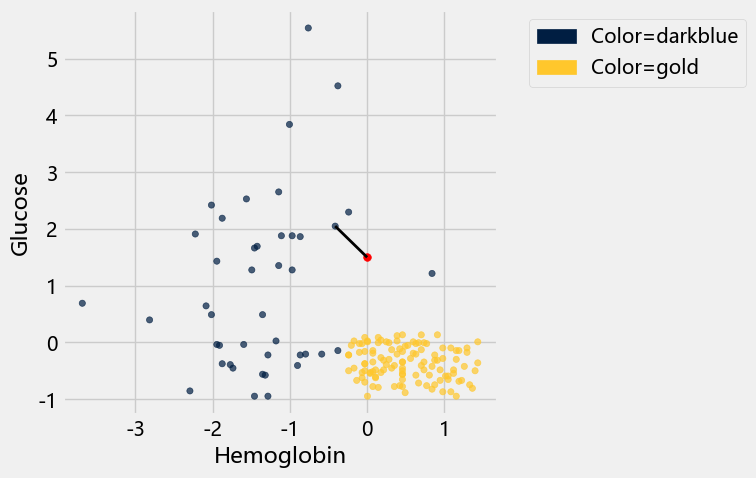

In [9]:
# In this example, Alice's Hemoglobin attribute is 0 and her Glucose is 1.5.
alice = make_array(0, 1.5)
show_closest(alice)

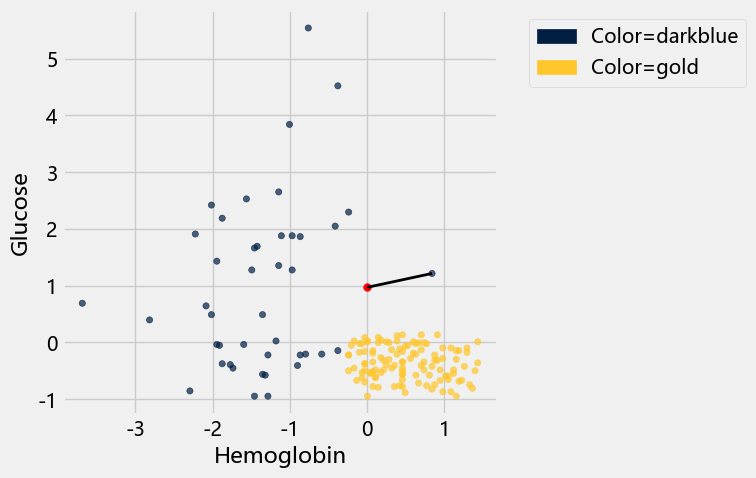

In [10]:
alice = make_array(0, 0.97)
show_closest(alice)

In [11]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Hemoglobin', x_array,
    'Glucose', y_array
)

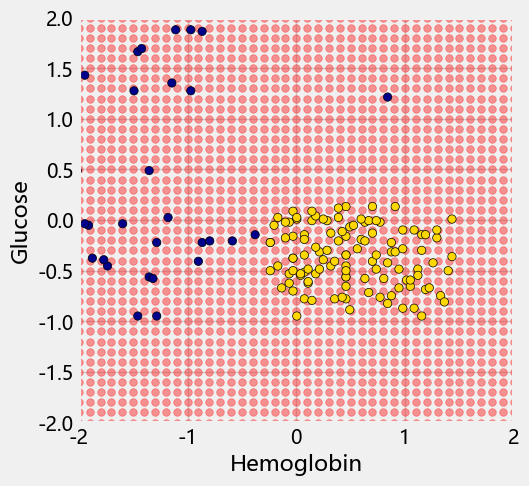

In [12]:
test_grid.scatter('Hemoglobin', 'Glucose', color='red', alpha=0.4, s=30)

plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);

In [13]:
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

In [14]:
c = classify_grid(ckd.drop('White Blood Cell Count', 'Color'), test_grid, 1)

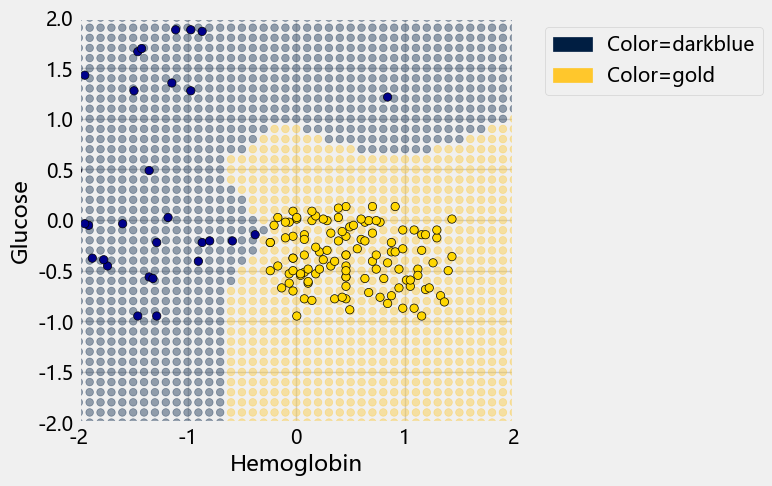

In [15]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('Hemoglobin', 'Glucose', group='Color', alpha=0.4, s=30)

plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), edgecolor='k')

plt.xlim(-2, 2)
plt.ylim(-2, 2);

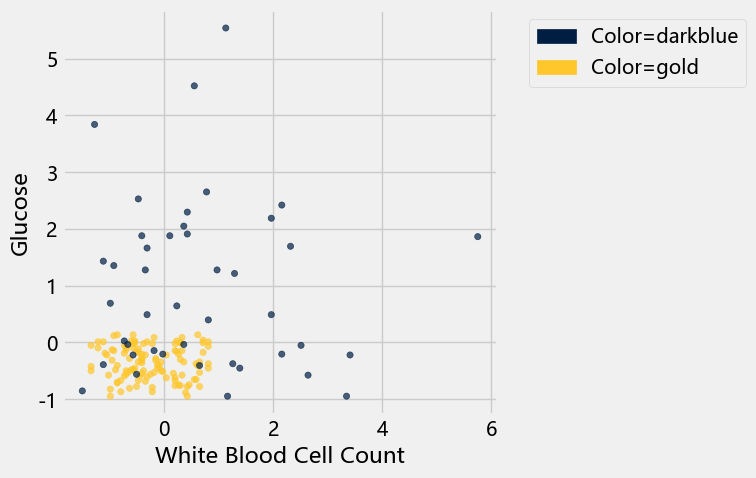

In [16]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Color')

### 2. Training and Testing

In [17]:
import matplotlib
#matplotlib.use('Agg')
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [19]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)
def distance(pt1, pt2):
    return np.sqrt(np.sum((pt1 - pt2)**2))

def all_dists(training, p):
    attributes = training.drop('Class')
    def dist_point_row(row):
        return distance(np.array(row), p)
    return attributes.apply(dist_point_row)

def table_with_distances(training, p):
    return training.with_column('Distance', all_dists(training, p))

def closest(training, p, k):
    with_dists = table_with_distances(training, p)
    sorted_by_dist = with_dists.sort('Distance')
    topk = sorted_by_dist.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        # Run the classifier on the ith patient in the test set
        c = np.append(c, classify(training, make_array(test.row(i)), k))   
    return c

In [20]:
ckd = Table.read_table(path_data + 'ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)

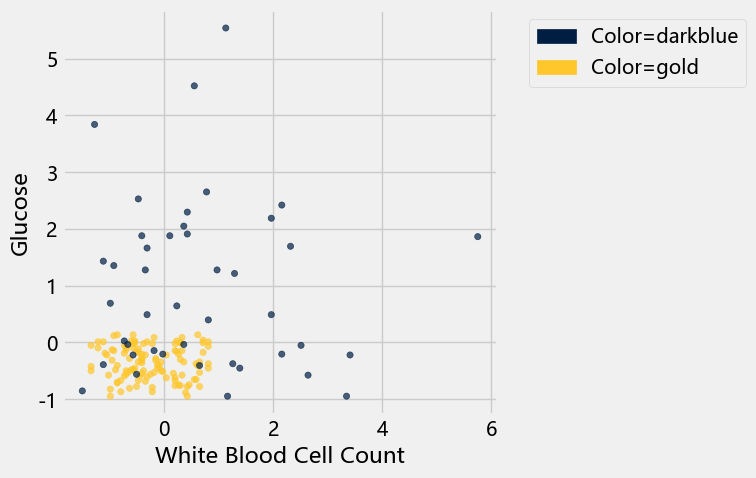

In [21]:
ckd.scatter('White Blood Cell Count', 'Glucose', group='Color')

In [22]:
shuffled_ckd = ckd.sample(with_replacement=False)
training = shuffled_ckd.take(np.arange(79))
testing = shuffled_ckd.take(np.arange(79, 158))

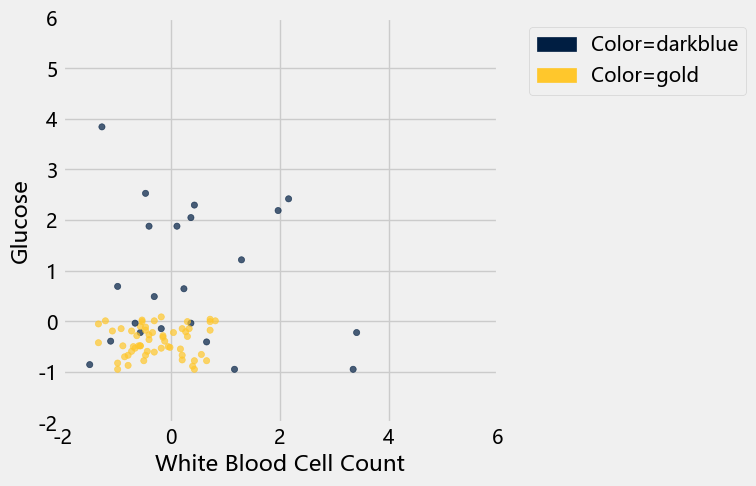

In [23]:
training.scatter('White Blood Cell Count', 'Glucose', group='Color')
plt.xlim(-2, 6)
plt.ylim(-2, 6);

In [24]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 6.1, 0.25):
    for y in np.arange(-2, 6.1, 0.25):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Glucose', x_array,
    'White Blood Cell Count', y_array
)

In [25]:
c = classify_grid(training.drop('Hemoglobin', 'Color'), test_grid, 1)

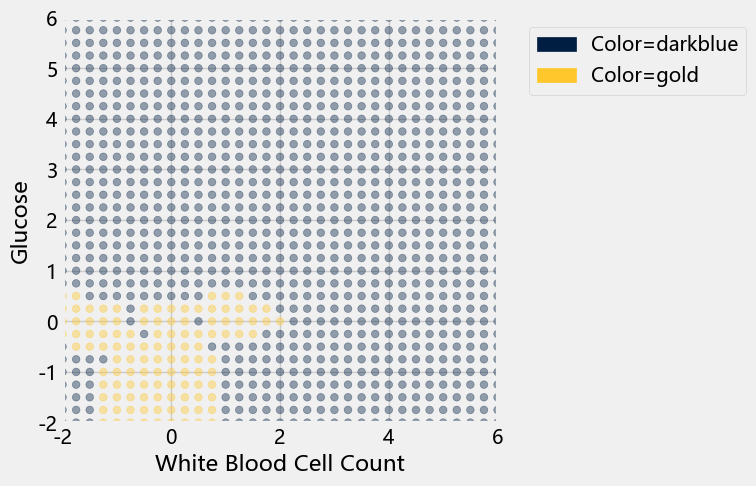

In [26]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('White Blood Cell Count', 'Glucose', group='Color', alpha=0.4, s=30)

plt.xlim(-2, 6)
plt.ylim(-2, 6);

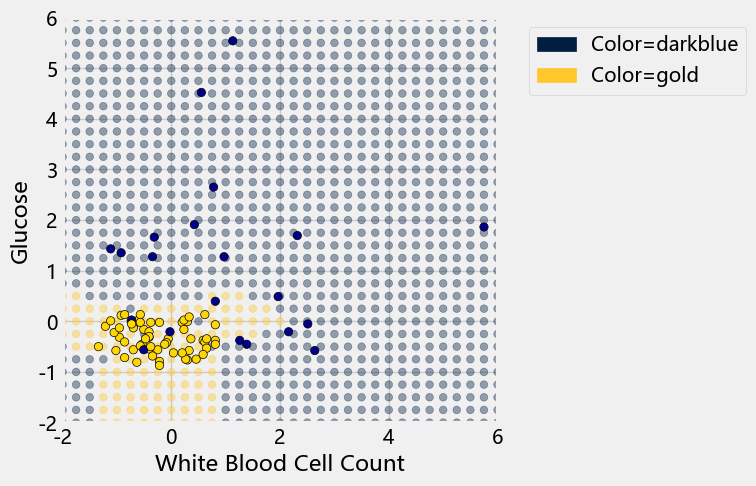

In [27]:
test_grid = test_grid.with_column('Class', c).join('Class', color_table)
test_grid.scatter('White Blood Cell Count', 'Glucose', group='Color', alpha=0.4, s=30)

plt.scatter(testing.column('White Blood Cell Count'), testing.column('Glucose'), c=testing.column('Color'), edgecolor='k')

plt.xlim(-2, 6)
plt.ylim(-2, 6);

### 3. Rows of Tables

In [28]:
import matplotlib
#matplotlib.use('Agg')
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plots.style.use('fivethirtyeight')

In [29]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

In [30]:
ckd = Table.read_table(path_data + 'ckd.csv').relabeled('Blood Glucose Random', 'Glucose')

In [31]:
ckd.row(0)

Row(Age=48, Blood Pressure=70, Specific Gravity=1.0049999999999999, Albumin=4, Sugar=0, Red Blood Cells='normal', Pus Cell='abnormal', Pus Cell clumps='present', Bacteria='notpresent', Glucose=117, Blood Urea=56, Serum Creatinine=3.7999999999999998, Sodium=111, Potassium=2.5, Hemoglobin=11.199999999999999, Packed Cell Volume=32, White Blood Cell Count=6700, Red Blood Cell Count=3.8999999999999999, Hypertension='yes', Diabetes Mellitus='no', Coronary Artery Disease='no', Appetite='poor', Pedal Edema='yes', Anemia='yes', Class=1)

In [32]:
ckd.row(0).item(3)

4

In [33]:
ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'Class', ckd.column('Class')
)

color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd = ckd.join('Class', color_table)
ckd

Class,Hemoglobin,Glucose,Color
0,0.456884,0.133751,gold
0,1.153,-0.947597,gold
0,0.770138,-0.762223,gold
0,0.596108,-0.190654,gold
0,-0.239236,-0.49961,gold
0,-0.0304002,-0.159758,gold
0,0.282854,-0.00527964,gold
0,0.108824,-0.623193,gold
0,0.0740178,-0.515058,gold
0,0.83975,-0.422371,gold


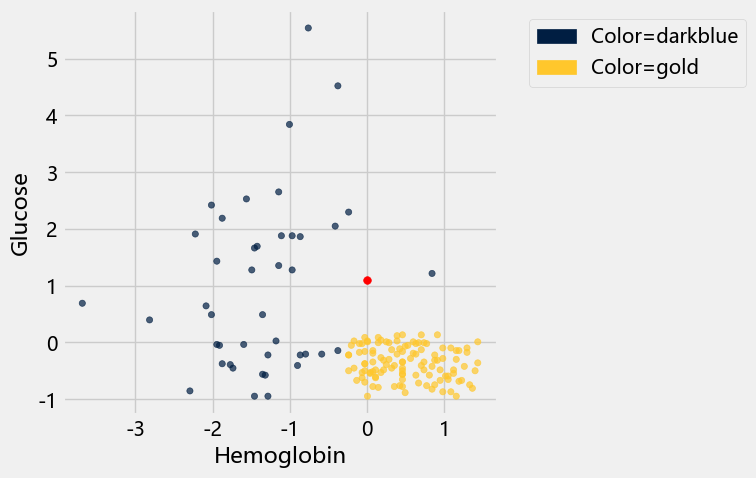

In [34]:
alice = make_array(0, 1.1)
ckd.scatter('Hemoglobin', 'Glucose', group='Color')
plots.scatter(alice.item(0), alice.item(1), color='red', s=30);

In [35]:
ckd_attributes = ckd.select('Hemoglobin', 'Glucose')
ckd_attributes

Hemoglobin,Glucose
0.456884,0.133751
1.153,-0.947597
0.770138,-0.762223
0.596108,-0.190654
-0.239236,-0.49961
-0.0304002,-0.159758
0.282854,-0.00527964
0.108824,-0.623193
0.0740178,-0.515058
0.83975,-0.422371


In [36]:
ckd_attributes.row(3)

Row(Hemoglobin=0.59610766482326683, Glucose=-0.19065363034327712)

In [37]:
np.array(ckd_attributes.row(3))

array([ 0.59610766, -0.19065363])

In [38]:
patient3 = np.array(ckd_attributes.row(3))
alice, patient3

(array([ 0. ,  1.1]), array([ 0.59610766, -0.19065363]))

In [39]:
distance = np.sqrt(np.sum((alice - patient3)**2))
distance

1.4216649188818471

In [40]:
def distance(point1, point2):
    """Returns the Euclidean distance between point1 and point2.
    
    Each argument is an array containing the coordinates of a point."""
    return np.sqrt(np.sum((point1 - point2)**2))

In [41]:
distance(alice, patient3)

1.4216649188818471

In [42]:
t = ckd_attributes.take(np.arange(5))
t

Hemoglobin,Glucose
0.456884,0.133751
1.153,-0.947597
0.770138,-0.762223
0.596108,-0.190654
-0.239236,-0.49961


In [43]:
def max_abs(row):
    return np.max(np.abs(np.array(row)))

In [44]:
max_abs(t.row(4))

0.49961028259186968

In [45]:
t.apply(max_abs)

array([ 0.4568837 ,  1.15300352,  0.77013762,  0.59610766,  0.49961028])

In [46]:
def distance_from_alice(row):
    """Returns distance between Alice and a row of the attributes table"""
    return distance(alice, np.array(row))

In [47]:
distance_from_alice(ckd_attributes.row(3))

1.4216649188818471

In [48]:
distances = ckd_attributes.apply(distance_from_alice)
ckd_with_distances = ckd.with_column('Distance from Alice', distances)

In [49]:
ckd_with_distances

Class,Hemoglobin,Glucose,Color,Distance from Alice
0,0.456884,0.133751,gold,1.06882
0,1.153,-0.947597,gold,2.34991
0,0.770138,-0.762223,gold,2.01519
0,0.596108,-0.190654,gold,1.42166
0,-0.239236,-0.49961,gold,1.6174
0,-0.0304002,-0.159758,gold,1.26012
0,0.282854,-0.00527964,gold,1.1409
0,0.108824,-0.623193,gold,1.72663
0,0.0740178,-0.515058,gold,1.61675
0,0.83975,-0.422371,gold,1.73862


In [50]:
sorted_by_distance = ckd_with_distances.sort('Distance from Alice')
sorted_by_distance

Class,Hemoglobin,Glucose,Color,Distance from Alice
1,0.83975,1.2151,darkblue,0.847601
1,-0.970162,1.27689,darkblue,0.986156
0,-0.0304002,0.0874074,gold,1.01305
0,0.14363,0.0874074,gold,1.02273
1,-0.413266,2.04928,darkblue,1.03534
0,0.387272,0.118303,gold,1.05532
0,0.456884,0.133751,gold,1.06882
0,0.178436,0.0410639,gold,1.07386
0,0.00440582,0.025616,gold,1.07439
0,-0.169624,0.025616,gold,1.08769


In [51]:
alice_5_nearest_neighbors = sorted_by_distance.take(np.arange(5))
alice_5_nearest_neighbors

Class,Hemoglobin,Glucose,Color,Distance from Alice
1,0.83975,1.2151,darkblue,0.847601
1,-0.970162,1.27689,darkblue,0.986156
0,-0.0304002,0.0874074,gold,1.01305
0,0.14363,0.0874074,gold,1.02273
1,-0.413266,2.04928,darkblue,1.03534


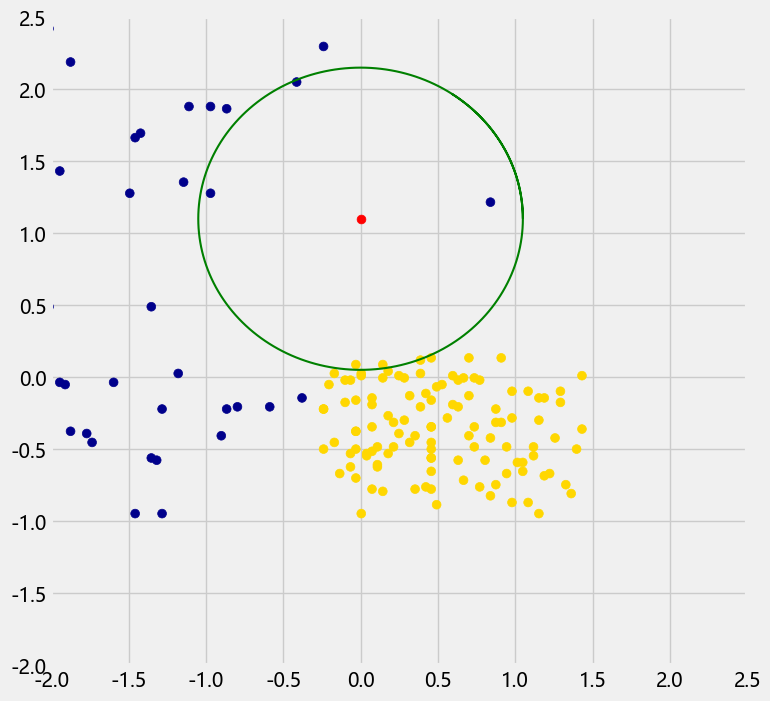

In [52]:
plots.figure(figsize=(8,8))
plots.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'), c=ckd.column('Color'), s=40)
#ckd.scatter('Hemoglobin', 'Glucose', group='Color')
plots.scatter(alice.item(0), alice.item(1), color='red', s=40)
radius = sorted_by_distance.column('Distance from Alice').item(4)+0.014
theta = np.arange(0, 2*np.pi+1, 2*np.pi/200)
plots.plot(radius*np.cos(theta)+alice.item(0), radius*np.sin(theta)+alice.item(1), color='g', lw=1.5);
plots.xlim(-2, 2.5)
plots.ylim(-2, 2.5);

### 4. Implementing the Classifier

In [53]:
import matplotlib
#matplotlib.use('Agg')
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [54]:
banknotes = Table.read_table(path_data + 'banknote.csv')
banknotes

WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
3.5912,3.0129,0.72888,0.56421,0
2.0922,-6.81,8.4636,-0.60216,0
3.2032,5.7588,-0.75345,-0.61251,0
1.5356,9.1772,-2.2718,-0.73535,0


In [55]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)

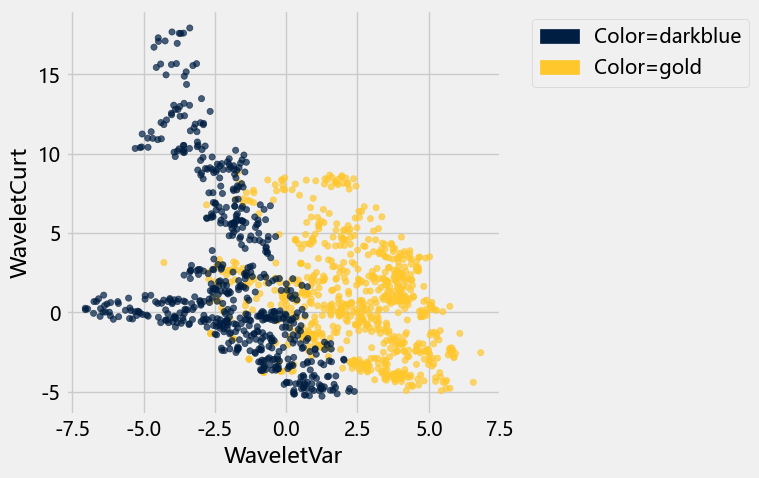

In [56]:
banknotes = banknotes.join('Class', color_table)
banknotes.scatter('WaveletVar', 'WaveletCurt', group='Color')

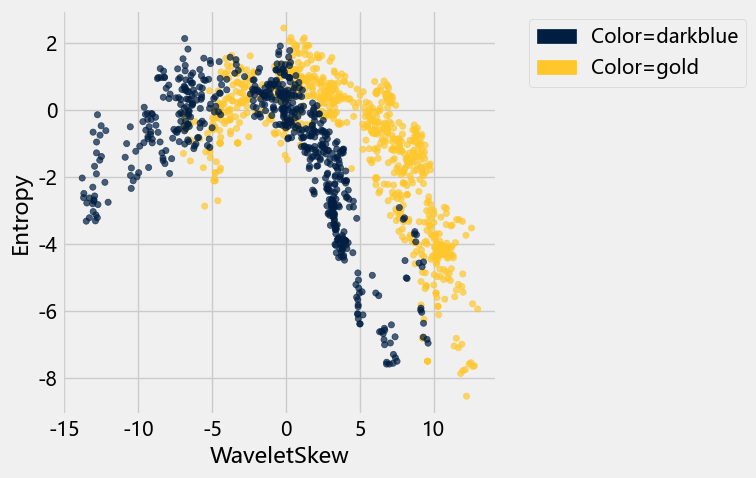

In [57]:
banknotes.scatter('WaveletSkew', 'Entropy', group='Color')

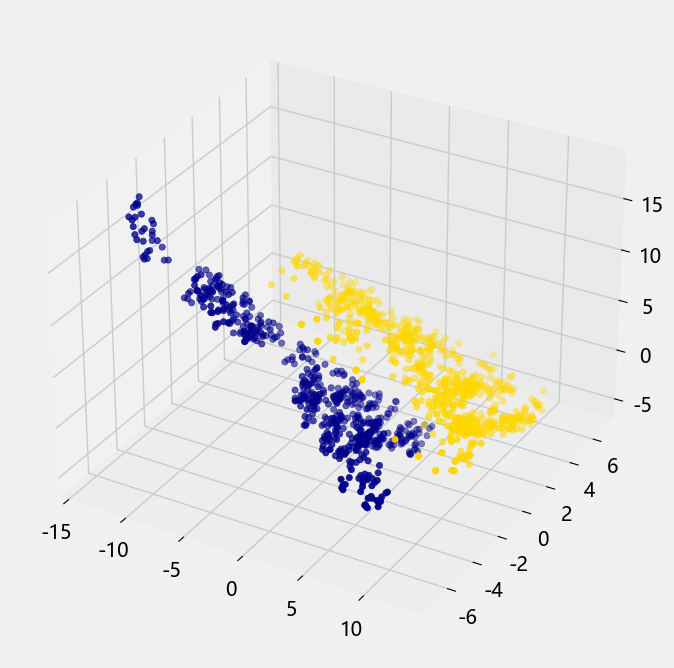

In [58]:
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
           banknotes.column('WaveletCurt'), 
           c=banknotes.column('Color'));

In [59]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

In [61]:
wine = Table.read_table(path_data + 'wine.csv')

# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))
wine

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [62]:
wine_attributes = wine.drop('Class')

In [63]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(1)))

31.265012394048398

In [64]:
distance(np.array(wine_attributes.row(0)), np.array(wine_attributes.row(177)))

506.05936766351834

In [65]:
wine_with_colors = wine.join('Class', color_table)

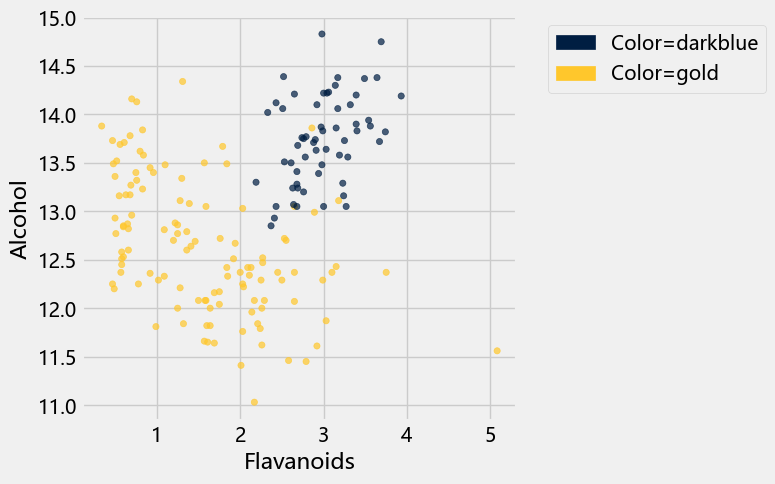

In [66]:
wine_with_colors.scatter('Flavanoids', 'Alcohol', group='Color')

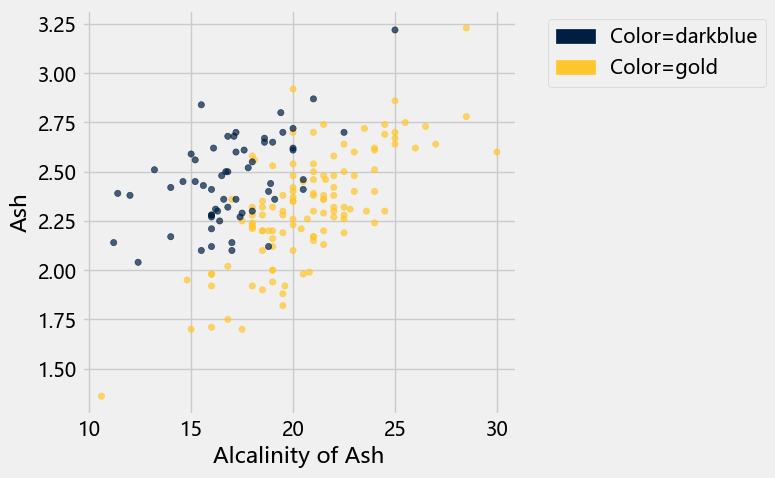

In [67]:
wine_with_colors.scatter('Alcalinity of Ash', 'Ash', group='Color')

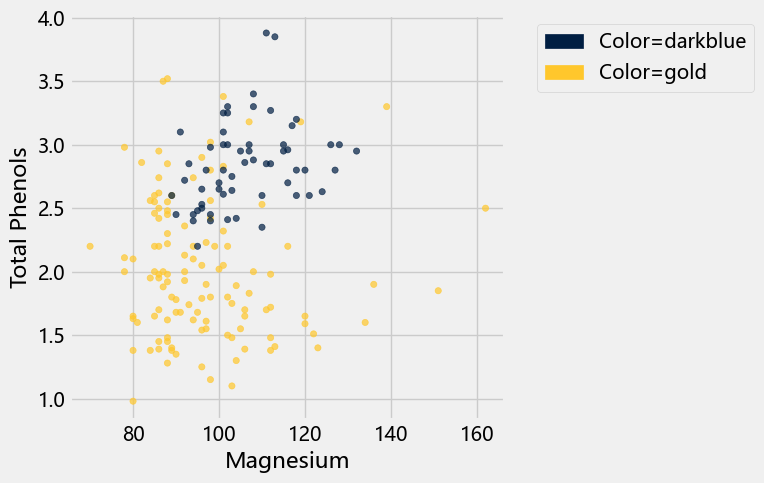

In [68]:
wine_with_colors.scatter('Magnesium', 'Total Phenols', group='Color')

In [69]:
def closest(training, p, k):
    ...

def majority(topkclasses):
    ...

def classify(training, p, k):
    kclosest = closest(training, p, k)
    kclosest.classes = kclosest.select('Class')
    return majority(kclosest)

In [70]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [71]:
special_wine = wine.drop('Class').row(0)

In [72]:
closest(wine, special_wine, 5)

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline,Distance
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.74,1.67,2.25,16.4,118,2.6,2.9,0.21,1.62,5.85,0.92,3.2,1060,10.3928
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080,22.3407
1,14.1,2.02,2.4,18.8,103,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060,24.7602
1,14.38,3.59,2.28,16,102,3.25,3.17,0.27,2.19,4.9,1.04,3.44,1065,25.0947


In [73]:
def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [74]:
classify(wine, special_wine, 5)

1

In [75]:
special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

0

### 5. Accuracy of the Classifier

In [76]:
import matplotlib
#matplotlib.use('Agg')
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import scipy.stats as stats
plt.style.use('fivethirtyeight')

In [77]:
def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    """Augments the training table 
    with a column of distances from new_point"""
    return training.with_column('Distance', all_distances(training, new_point))

def closest(training, new_point, k):
    """Returns a table of the k rows of the augmented table
    corresponding to the k smallest distances"""
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [78]:
wine = Table.read_table(path_data + 'wine.csv')

# For converting Class to binary

def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))

In [79]:
shuffled_wine = wine.sample(with_replacement=False) 
training_set = shuffled_wine.take(np.arange(89))
test_set  = shuffled_wine.take(np.arange(89, 178))

In [80]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Class')) / test.num_rows

In [81]:
evaluate_accuracy(training_set, test_set, 5)

0.9325842696629213

In [82]:
patients = Table.read_table(path_data + 'breast-cancer.csv').drop('ID')
patients

Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
5,1,1,1,2,1,3,1,1,0
5,4,4,5,7,10,3,2,1,0
3,1,1,1,2,2,3,1,1,0
6,8,8,1,3,4,3,7,1,0
4,1,1,3,2,1,3,1,1,0
8,10,10,8,7,10,9,7,1,1
1,1,1,1,2,10,3,1,1,0
2,1,2,1,2,1,3,1,1,0
2,1,1,1,2,1,1,1,5,0
4,2,1,1,2,1,2,1,1,0


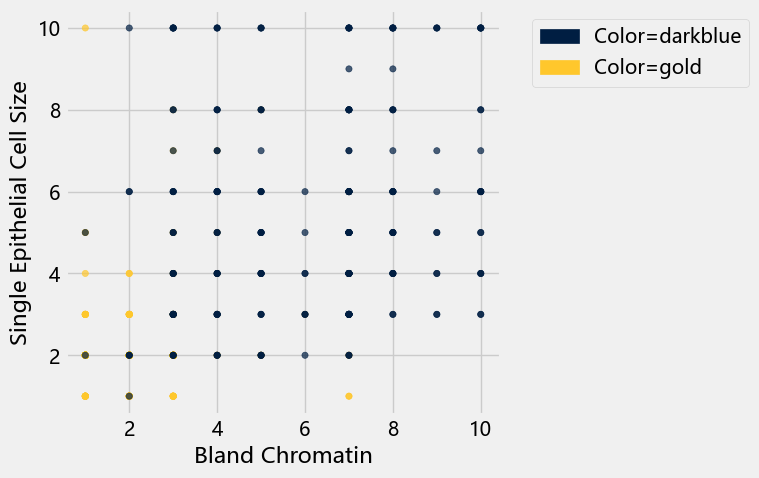

In [83]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
patients_with_colors = patients.join('Class', color_table)
patients_with_colors.scatter('Bland Chromatin', 'Single Epithelial Cell Size', group='Color')

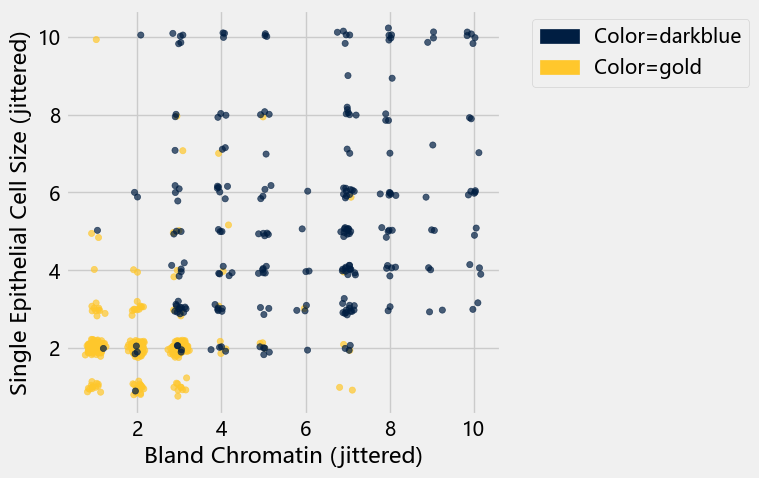

In [84]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))
Table().with_columns(
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class', patients.column('Class')
    ).join('Class', color_table).scatter(1, 2, group='Color')

In [93]:
shuffled_patients = patients.sample(683, with_replacement=False) 
training_set = shuffled_patients.take(np.arange(342))
test_set  = shuffled_patients.take(np.arange(342, 683))

In [94]:
evaluate_accuracy(training_set, test_set, 5)

0.9824046920821115

### 6. Multiple Regression

In [95]:
from datascience import *
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

np.set_printoptions(suppress=True)

In [96]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [97]:
all_sales = Table.read_table(path_data + 'house.csv')
sales = all_sales.where('Bldg Type', '1Fam').where('Sale Condition', 'Normal').select(
    'SalePrice', '1st Flr SF', '2nd Flr SF', 
    'Total Bsmt SF', 'Garage Area', 
    'Wood Deck SF', 'Open Porch SF', 'Lot Area', 
    'Year Built', 'Yr Sold')
sales.sort('SalePrice')

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
35000,498,0,498,216,0,0,8088,1922,2006
39300,334,0,0,0,0,0,5000,1946,2007
40000,649,668,649,250,0,54,8500,1920,2008
45000,612,0,0,308,0,0,5925,1940,2009
52000,729,0,270,0,0,0,4130,1935,2008
52500,693,0,693,0,0,20,4118,1941,2006
55000,723,363,723,400,0,24,11340,1920,2008
55000,796,0,796,0,0,0,3636,1922,2008
57625,810,0,0,280,119,24,21780,1910,2009
58500,864,0,864,200,0,0,8212,1914,2010


c:\Users\Skywalker\AppData\Local\Programs\Python\Python310\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


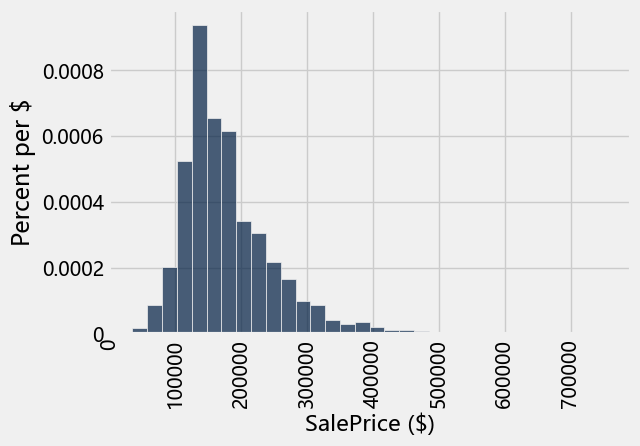

In [98]:
sales.hist('SalePrice', bins=32, unit='$')

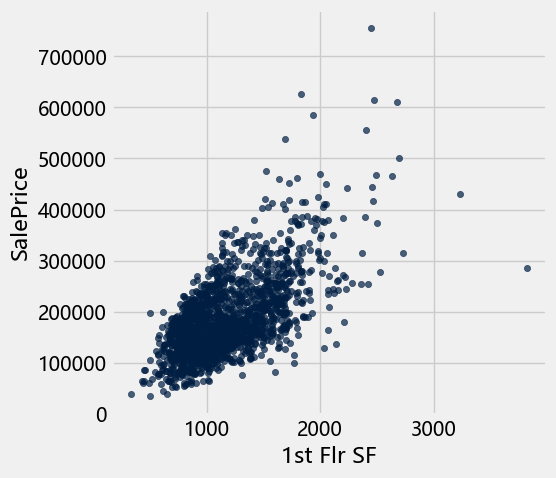

In [99]:
sales.scatter('1st Flr SF', 'SalePrice')

In [100]:
correlation(sales, 'SalePrice', '1st Flr SF')

0.64246625410302249

In [101]:
for label in sales.labels:
    print('Correlation of', label, 'and SalePrice:\t', correlation(sales, label, 'SalePrice'))

Correlation of SalePrice and SalePrice:	 1.0
Correlation of 1st Flr SF and SalePrice:	 0.642466254103
Correlation of 2nd Flr SF and SalePrice:	 0.35752189428
Correlation of Total Bsmt SF and SalePrice:	 0.652978626757
Correlation of Garage Area and SalePrice:	 0.638594485252
Correlation of Wood Deck SF and SalePrice:	 0.352698666195
Correlation of Open Porch SF and SalePrice:	 0.336909417026
Correlation of Lot Area and SalePrice:	 0.290823455116
Correlation of Year Built and SalePrice:	 0.565164753714
Correlation of Yr Sold and SalePrice:	 0.0259485790807


In [102]:
both_floors = sales.column(1) + sales.column(2)
correlation(sales.with_column('Both Floors', both_floors), 'SalePrice', 'Both Floors')

0.7821920556134877

In [103]:
train, test = sales.split(1001)
print(train.num_rows, 'training and', test.num_rows, 'test instances.')

1001 training and 1001 test instances.


In [104]:
def predict(slopes, row):
    return sum(slopes * np.array(row))

example_row = test.drop('SalePrice').row(0)
print('Predicting sale price for:', example_row)
example_slopes = np.random.normal(10, 1, len(example_row))
print('Using slopes:', example_slopes)
print('Result:', predict(example_slopes, example_row))

Predicting sale price for: Row(1st Flr SF=1746, 2nd Flr SF=0, Total Bsmt SF=1746.0, Garage Area=758.0, Wood Deck SF=201, Open Porch SF=39, Lot Area=14892, Year Built=2006, Yr Sold=2009)
Using slopes: [ 11.02476661   9.27847777  11.1082079    9.00481532  10.08582348
   9.30869965   9.90453589   9.05305805   9.24027349]
Result: 232082.605736


In [105]:
print('Actual sale price:', test.column('SalePrice').item(0))
print('Predicted sale price using random slopes:', predict(example_slopes, example_row))

Actual sale price: 377500
Predicted sale price using random slopes: 232082.605736


In [106]:
train_prices = train.column(0)
train_attributes = train.drop(0)

def rmse(slopes, attributes, prices):
    errors = []
    for i in np.arange(len(prices)):
        predicted = predict(slopes, attributes.row(i))
        actual = prices.item(i)
        errors.append((predicted - actual) ** 2)
    return np.mean(errors) ** 0.5

def rmse_train(slopes):
    return rmse(slopes, train_attributes, train_prices)

print('RMSE of all training examples using random slopes:', rmse_train(example_slopes))

RMSE of all training examples using random slopes: 95305.67316


In [107]:
best_slopes = minimize(rmse_train, start=example_slopes, smooth=True, array=True)
print('The best slopes for the training set:')
Table(train_attributes.labels).with_row(list(best_slopes)).show()
print('RMSE of all training examples using the best slopes:', rmse_train(best_slopes))

The best slopes for the training set:


1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Wood Deck SF,Open Porch SF,Lot Area,Year Built,Yr Sold
70.5444,71.8684,45.4083,45.3823,38.6589,17.5628,0.625562,589.664,-581.069


RMSE of all training examples using the best slopes: 30060.0533188


In [108]:
test_prices = test.column(0)
test_attributes = test.drop(0)

def rmse_test(slopes):
    return rmse(slopes, test_attributes, test_prices)

rmse_linear = rmse_test(best_slopes)
print('Test set RMSE for multiple linear regression:', rmse_linear)

Test set RMSE for multiple linear regression: 32319.6265699


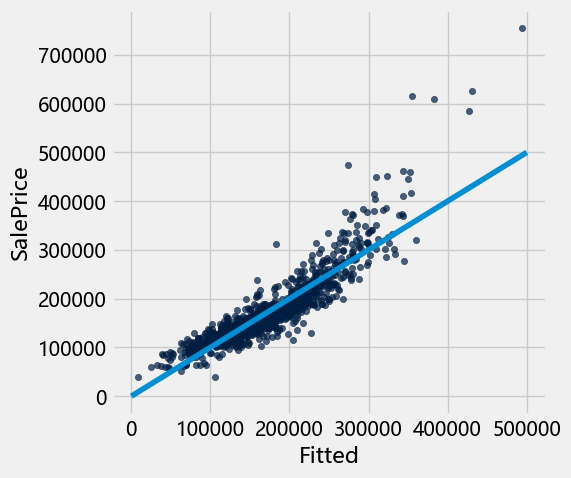

In [109]:
def fit(row):
    return sum(best_slopes * np.array(row))

test.with_column('Fitted', test.drop(0).apply(fit)).scatter('Fitted', 0)
plots.plot([0, 5e5], [0, 5e5]);

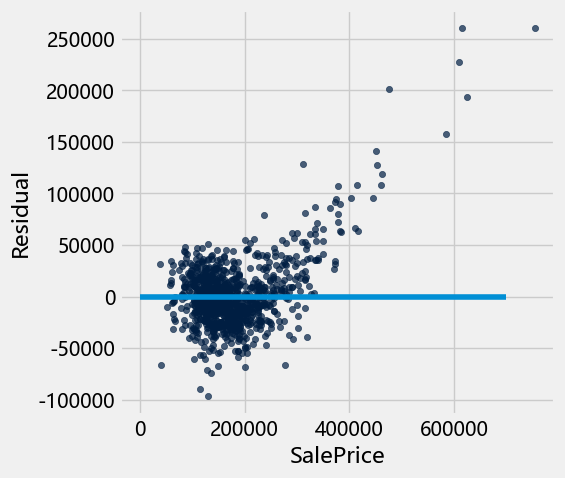

In [110]:
test.with_column('Residual', test_prices-test.drop(0).apply(fit)).scatter(0, 'Residual')
plots.plot([0, 7e5], [0, 0]);

In [111]:
train_nn = train.select(0, 1, 2, 3, 4, 8)
test_nn = test.select(0, 1, 2, 3, 4, 8)
train_nn.show(3)

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Year Built
325000,1652,0,1652,840,2006
180000,1721,0,1461,440,1968
172000,1168,800,784,530,1969


In [112]:
def distance(pt1, pt2):
    """The distance between two points, represented as arrays."""
    return np.sqrt(sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """The distance between two rows of a table."""
    return distance(np.array(row1), np.array(row2))

def distances(training, example, output):
    """Compute the distance from example for each row in training."""
    dists = []
    attributes = training.drop(output)
    for row in attributes.rows:
        dists.append(row_distance(row, example))
    return training.with_column('Distance', dists)

def closest(training, example, k, output):
    """Return a table of the k closest neighbors to example."""
    return distances(training, example, output).sort('Distance').take(np.arange(k))

example_nn_row = test_nn.drop(0).row(0)
closest(train_nn, example_nn_row, 5, 'SalePrice')

SalePrice,1st Flr SF,2nd Flr SF,Total Bsmt SF,Garage Area,Year Built,Distance
275000,1787,0,1753,748,2001,43.0697
306000,1704,0,1704,772,2007,61.0328
300000,1786,0,1778,715,2002,67
275000,1698,0,1698,730,2005,73.437
286500,1712,0,1712,701,2002,74.6793


In [113]:
def predict_nn(example):
    """Return the majority class among the k nearest neighbors."""
    return np.average(closest(train_nn, example, 5, 'SalePrice').column('SalePrice'))

predict_nn(example_nn_row)

288500.0

In [114]:
print('Actual sale price:', test_nn.column('SalePrice').item(0))
print('Predicted sale price using nearest neighbors:', predict_nn(example_nn_row))

Actual sale price: 377500
Predicted sale price using nearest neighbors: 288500.0


In [115]:
nn_test_predictions = test_nn.drop('SalePrice').apply(predict_nn)
rmse_nn = np.mean((test_prices - nn_test_predictions) ** 2) ** 0.5

print('Test set RMSE for multiple linear regression: ', rmse_linear)
print('Test set RMSE for nearest neighbor regression:', rmse_nn)

Test set RMSE for multiple linear regression:  32319.6265699
Test set RMSE for nearest neighbor regression: 33059.2474447


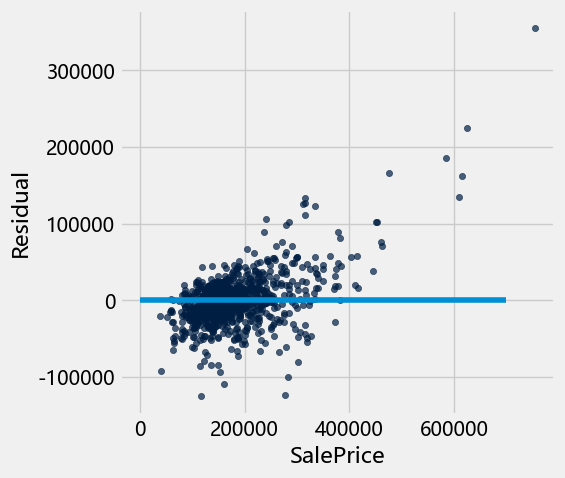

In [116]:
test.with_column('Residual', test_prices-nn_test_predictions).scatter(0, 'Residual')
plots.plot([0, 7e5], [0, 0]);